In [132]:
from src.constants import FILEPATH_PREPROCESSED, FILEPATH_FIGURES
import os
import pm4py
import pandas as pd

In [109]:
df = pd.read_csv(FILEPATH_PREPROCESSED + 'BPI Challenge 2018.csv')

In [99]:
df = pd.DataFrame([['A', 'mail income', '2023-01-01'],
                   ['A', 'calculate', '2023-01-03'],
                   ['A', 'accept', '2023-01-04'],
                   ['A', 'payment', '2023-01-05'],
                   ['B', 'mail income', '2023-01-06'],
                   ['B', 'calculate', '2023-01-07'],
                   ['B', 'reject', '2023-01-08']], columns=['case:concept:name', 'concept:name', 'time:timestamp'])

In [100]:
net, im, fm = pm4py.discovery.discover_petri_net_alpha(df)

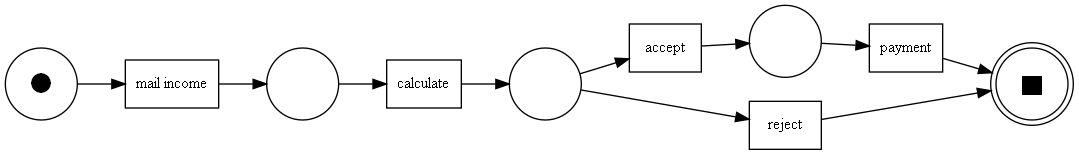

In [101]:
pm4py.view_petri_net(net, im, fm, format='png')

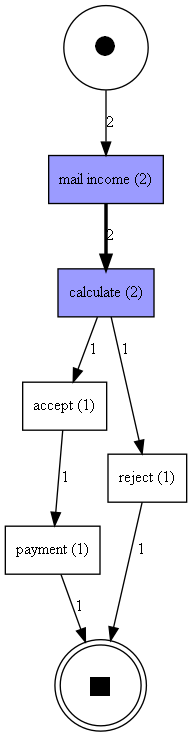

In [157]:
dfg, start, end = pm4py.discover_dfg(df)
pm4py.view_dfg(dfg, start, end)

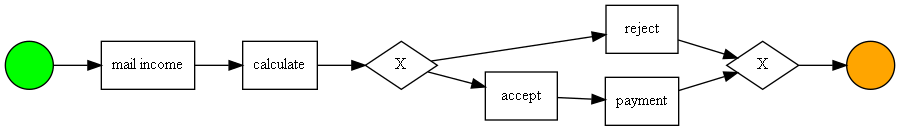

In [158]:
bpmn_graph = pm4py.discover_bpmn_inductive(df)
pm4py.view_bpmn(bpmn_graph)

In [110]:
df = pd.read_csv(FILEPATH_PREPROCESSED + 'Road_Traffic_Fine_Management_Process.csv')[['case:concept:name', 'concept:name', 'time:timestamp', 'object:name']]
df.head()

,case:concept:name,concept:name,time:timestamp,object:name
0,A1,Create Fine,2006-07-24 00:00:00+02:00,fine
1,A1,Send Fine,2006-12-05 00:00:00+01:00,fine
2,A100,Create Fine,2006-08-02 00:00:00+02:00,fine
3,A100,Send Fine,2006-12-12 00:00:00+01:00,fine
4,A100,Insert Fine Notification,2007-01-15 00:00:00+01:00,fine notification


In [111]:
df_pred = pd.read_csv('./outputs/results/predictions/svc.csv')

In [112]:
df_role = pd.merge(left=df, right=df_pred, on='concept:name', how='left').reset_index()
df_role = df_role.fillna('')

In [113]:
df_role['concept:name'].unique()

array(['Create Fine', 'Send Fine', 'Insert Fine Notification',
       'Add penalty', 'Send for Credit Collection', 'Payment',
       'Insert Date Appeal to Prefecture', 'Send Appeal to Prefecture',
       'Receive Result Appeal from Prefecture',
       'Notify Result Appeal to Offender', 'Appeal to Judge'],
      dtype=object)

In [114]:
df_role = pd.merge(left=df, right=df_pred, on='concept:name', how='left').reset_index()
df_role = df_role.fillna('')
df_role['annotation'] = df_role['annotation'] + ' ' + df_role['object:name']
df_role['pred'] = df_role['pred'] + ' ' + df_role['object:name']

In [115]:
df_role = df_role[df_role['annotation'].str.contains('create') | df_role['annotation'].str.contains('move')]

In [116]:
df_role[['concept:name', 'annotation']].drop_duplicates()

,concept:name,annotation
0,Create Fine,create fine
1,Send Fine,move fine
6,Send for Credit Collection,move for credit collection
17,Send Appeal to Prefecture,move appeal
602,Receive Result Appeal from Prefecture,move result appeal


In [117]:
df_role['annotation'].unique()

array(['create fine', 'move fine', 'move for credit collection',
       'move appeal', 'move result appeal'], dtype=object)

In [118]:
df_role_pred = df_role[['case:concept:name', 'pred', 'time:timestamp']].rename(columns={'pred': 'concept:name'})
df_role_pred.head()

,case:concept:name,concept:name,time:timestamp
0,A1,create fine,2006-07-24 00:00:00+02:00
1,A1,move fine,2006-12-05 00:00:00+01:00
2,A100,create fine,2006-08-02 00:00:00+02:00
3,A100,move fine,2006-12-12 00:00:00+01:00
6,A100,move for credit collection,2009-03-30 00:00:00+02:00


In [46]:
df_role_pred[['case:concept:name', 'concept:name']].drop_duplicates()

,case:concept:name,concept:name
0,A1,create fine
1,A1,move fine
2,A100,create fine
3,A100,move fine
4,A100,create fine notification
...,...,...
561465,V9999,create fine
561466,V9999,move fine
561467,V9999,create fine notification
561468,V9999,create penalty


In [119]:
df_role_anno = df_role[['case:concept:name', 'annotation', 'time:timestamp']].rename(columns={'annotation': 'concept:name'})
df_role_anno

,case:concept:name,concept:name,time:timestamp
0,A1,create fine,2006-07-24 00:00:00+02:00
1,A1,move fine,2006-12-05 00:00:00+01:00
2,A100,create fine,2006-08-02 00:00:00+02:00
3,A100,move fine,2006-12-12 00:00:00+01:00
6,A100,move for credit collection,2009-03-30 00:00:00+02:00
...,...,...,...
561461,V9998,move fine,2002-10-25 00:00:00+02:00
561464,V9998,move for credit collection,2004-01-10 00:00:00+01:00
561465,V9999,create fine,2002-09-07 00:00:00+02:00
561466,V9999,move fine,2002-10-25 00:00:00+02:00


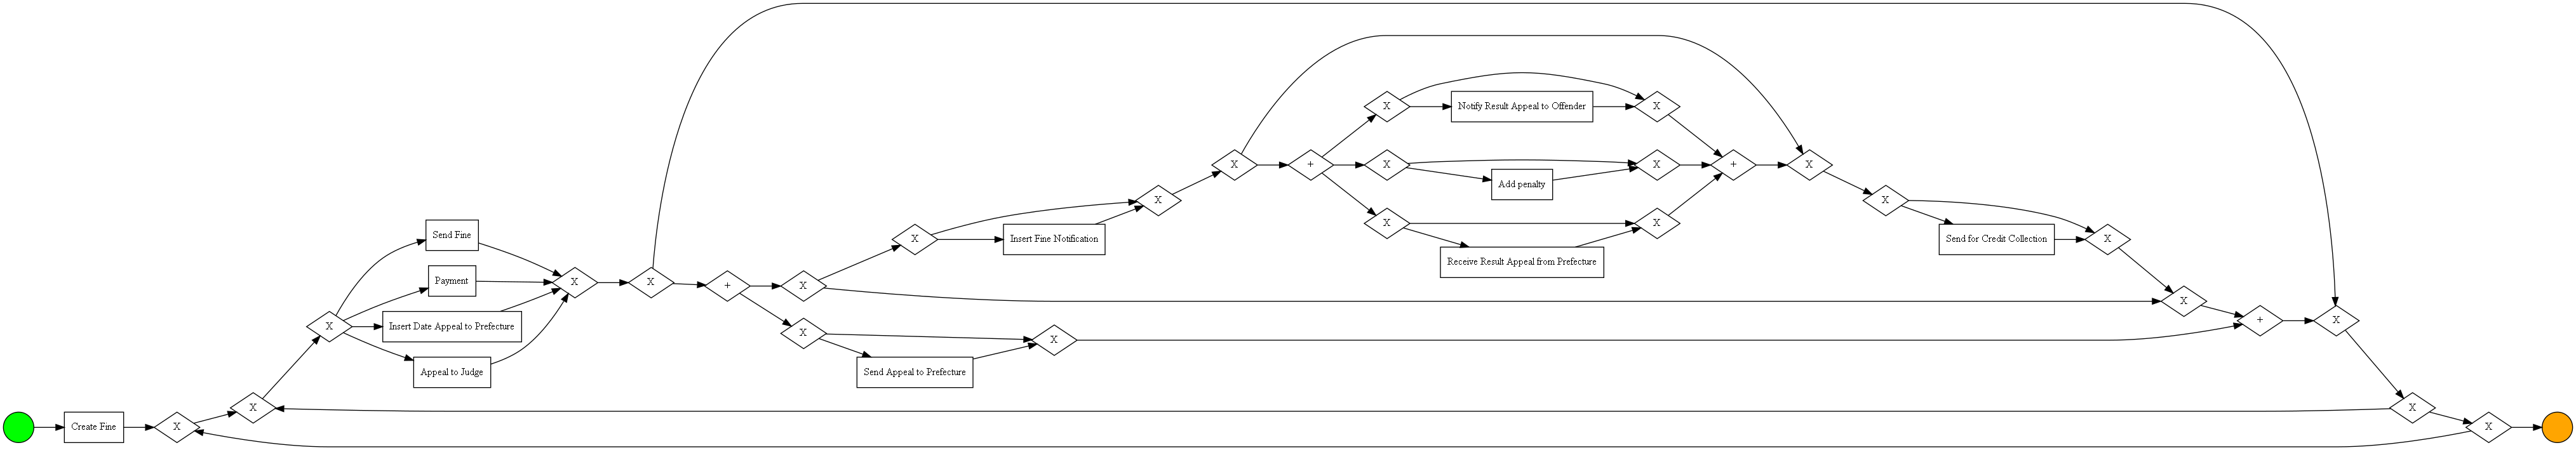

In [25]:
bpmn_graph = pm4py.discovery.discover_bpmn_inductive(df, noise_threshold=0)
pm4py.view_bpmn(bpmn_graph, format='png')

In [127]:
import os

In [133]:
dfg, start, end = pm4py.discover_dfg(df_role_anno)
pm4py.save_vis_dfg(dfg, start, end, os.path.join(FILEPATH_FIGURES, 'dfg.pdf'))

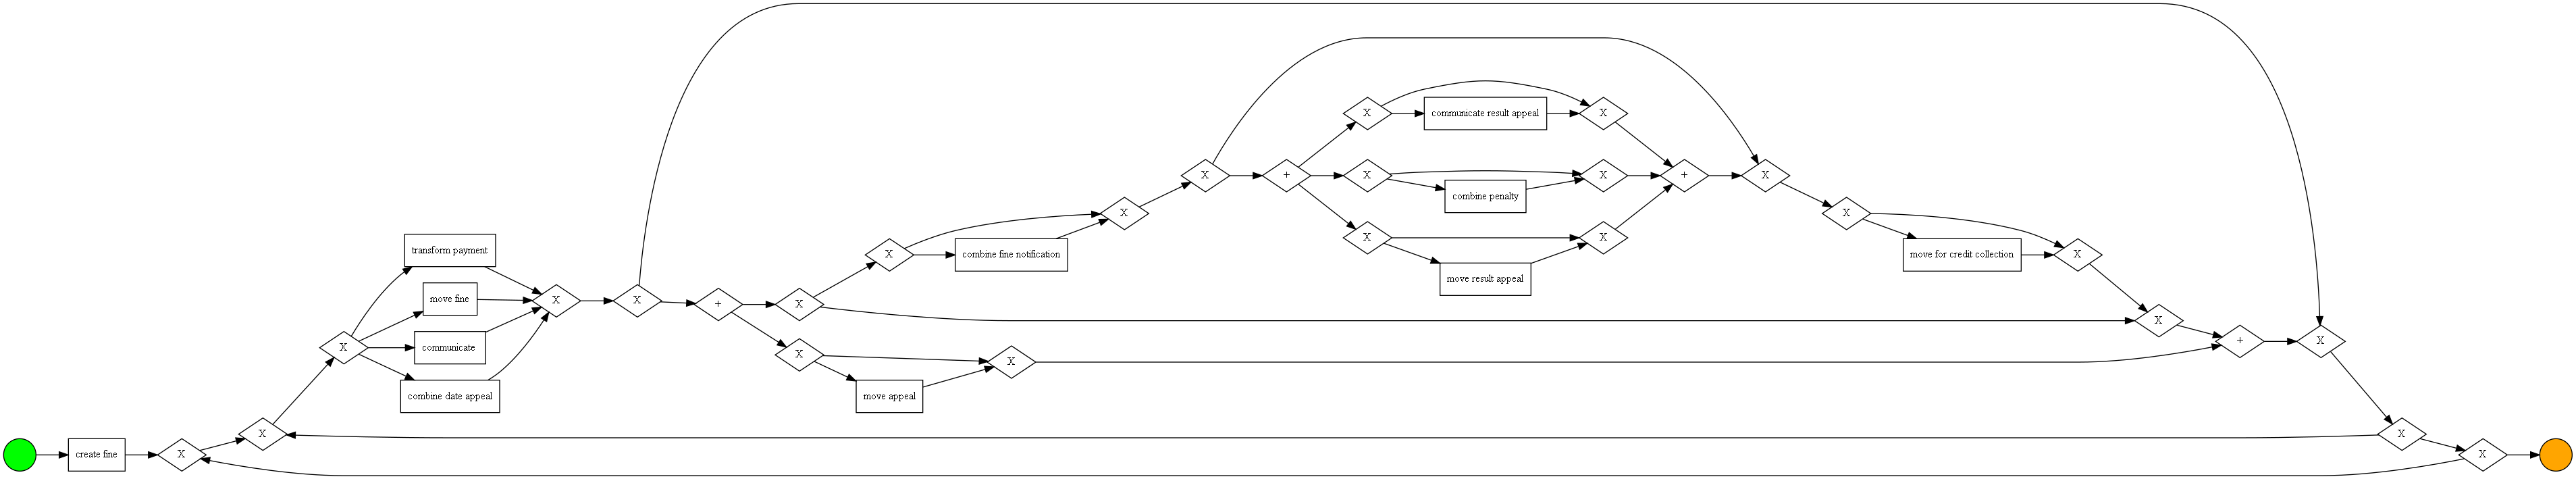

In [48]:
bpmn_graph = pm4py.discovery.discover_bpmn_inductive(df_role_anno, noise_threshold=0)
pm4py.view_bpmn(bpmn_graph, format='png')

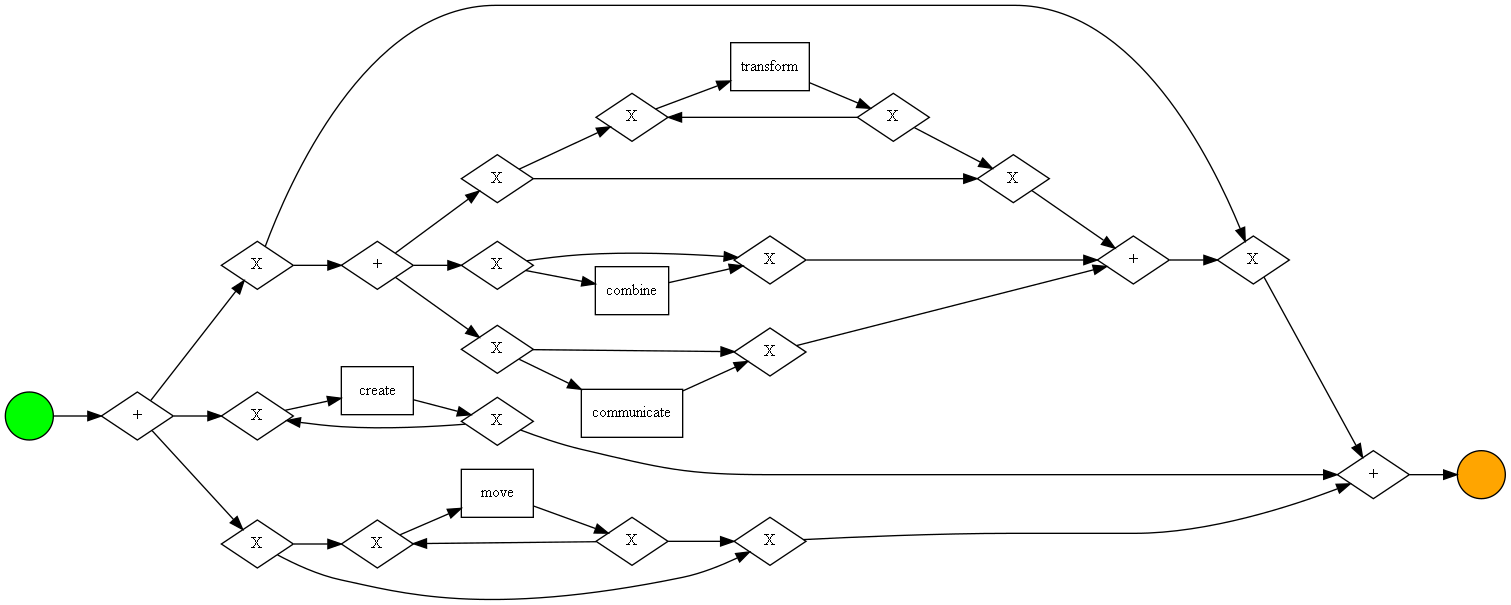

In [193]:
bpmn_graph = pm4py.discovery.discover_bpmn_inductive(df_role_pred, noise_threshold=0)
pm4py.view_bpmn(bpmn_graph, format='png')